# Workshop 1 - Inertia and transient simulation

<img src="figures/heat_ex5a.png" alt="ex5a" width="250"/>

We represent a building with a single thermal resistance $R$ (from the global heat transfer coefficient) and a single heat capacitance $C$. The solar irradiance $I_{sol}$ contributes to indoor heating through a coefficient $\alpha$. A heating power $\Phi$ is imposed on the indoor temperature. The evolution of the indoor temperature is thus driven by the differential equation:
\begin{equation}
C \frac{\partial T_i}{\partial t} = \frac{1}{R} \left(T_e-T_i\right) + \Phi + \alpha I_{sol}
\end{equation}

This balance equation can be discretised with an implicit scheme, in order to formulate the indoor temperature as function of the previous temperature and of the environment variables:

$$ C \frac{T_i^{t+1}-T_i^t}{\Delta t} = \frac{1}{R} \left(T_e^{t+1}-T_i^{t+1}\right) + \Phi^{t+1} + \alpha I_{sol}^{t+1}$$

$$ T_i^{t+1} = \frac{1}{C/\Delta t+1/R} \left( \frac{C}{\Delta t} T_i^t + \frac{1}{R} T_e^{t+1} + \Phi^{t+1} + \alpha I_{sol}^{t+1} \right) $$

### Part 1: example

We want to show the evolution of indoor temperature if there is no heating. We assume the following properties of the building:

* $C=10^7$ J/K
* $R = 8 \times 10^{-3}$ K/W
* $\alpha=2$ m$^2$

Weather data are in the file `workshop1_data.xlsx`. The following block loads this data and plots the outdoor temperature and solar irradiance

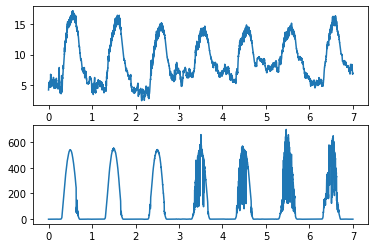

In [1]:
# Run this block first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('workshop1_data.xlsx')

time = df['Time (s)']
te = df['Te (C)']
isol = df['Isol (W/m2)']

fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(time/24/3600, te)
axes[1].plot(time/24/3600, isol)
plt.show()

The following block calculates the indoor temperature, one time point after the other. We suppose that the initial value is equal to the outdoor temperature.

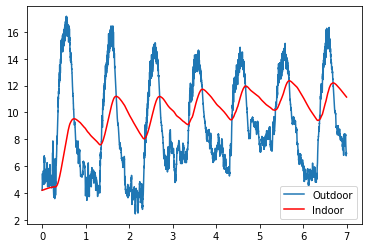

In [9]:
# initialization
ti = np.zeros(len(df))
ti[0] = te[0]

# Building properties
C = 1e7
R = 8e-3
alpha = 2
Phi = 0

# Calculation of the indoor temperature
for t in range(1, len(df)):
    dt = time[t] - time[t-1]
    ti[t] = 1/(C/dt + 1/R) * ( C/dt*ti[t-1] + 1/R*te[t] + Phi + alpha*isol[t])

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(time/24/3600, te, label='Outdoor')
axes.plot(time/24/3600, ti, color='red', label='Indoor')
axes.legend()
plt.show()

# Part 2: on you own

Questions: